In [ ]:
!nvidia-smi

Mon Nov 30 13:40:51 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!git clone https://github.com/parthv21/VOC-Semantic-Segmentation.git
!rm ./VOC-Semantic-Segmentation/main.ipynb
!mv ./VOC-Semantic-Segmentation/* .
!rm -rf VOC-Semantic-Segmentation


Cloning into 'VOC-Semantic-Segmentation'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 319 (delta 3), reused 8 (delta 2), pack-reused 309
Receiving objects: 100% (319/319), 2.75 GiB | 24.56 MiB/s, done.
Resolving deltas: 100% (136/136), done.
Checking out files: 100% (87/87), done.


In [ ]:
!wget https://s3.amazonaws.com/fast-ai-imagelocal/pascal-voc.tgz 
!tar -xzf ./pascal-voc.tgz
!rm -rf ./pascal-voc/VOC2007
!rm ./pascal-voc.tgz

--2020-11-30 12:40:11--  https://s3.amazonaws.com/fast-ai-imagelocal/pascal-voc.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.140.238
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.140.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4639722845 (4.3G) [application/x-tar]
Saving to: ‘pascal-voc.tgz’

pascal-voc.tgz      100%[===================>]   4.32G  31.8MB/s    in 2m 6s   

2020-11-30 12:42:18 (35.0 MB/s) - ‘pascal-voc.tgz’ saved [4639722845/4639722845]



In [ ]:
from voc12 import VOC2012
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import random
import pathlib
import torch

from model.FCN_resnet_bn_skp import FCN_resnet_bn_skp
from train import train, predict, load_model
from utils.visualization import visualizePrediction, compare_model_performance
from criterion.CrossEntropy import getCrossEntropyLoss

print(torch.__version__)

1.7.0+cu101


In [ ]:
voc2012 = VOC2012('./pascal-voc/VOC2012/')

ptrain = pathlib.Path('./voc2012_train_augumented.h5')
pval = pathlib.Path('./voc2012_val.h5')

if ptrain.is_file() and pval.is_file():
    voc2012.load_all_data_with_aug()
else:
    voc2012.read_all_data_and_save_with_aug()

Reading train images 100 / 1464
Reading train images 200 / 1464
Reading train images 300 / 1464
Reading train images 400 / 1464
Reading train images 500 / 1464
Reading train images 600 / 1464
Reading train images 700 / 1464
Reading train images 800 / 1464
Reading train images 900 / 1464
Reading train images 1000 / 1464
Reading train images 1100 / 1464
Reading train images 1200 / 1464
Reading train images 1300 / 1464
Reading train images 1400 / 1464
Reading train labels 100 / 1464
Reading train labels 200 / 1464
Reading train labels 300 / 1464
Reading train labels 400 / 1464
Reading train labels 500 / 1464
Reading train labels 600 / 1464
Reading train labels 700 / 1464
Reading train labels 800 / 1464
Reading train labels 900 / 1464
Reading train labels 1000 / 1464
Reading train labels 1100 / 1464
Reading train labels 1200 / 1464
Reading train labels 1300 / 1464
Reading train labels 1400 / 1464
Reading val images 100 / 1449
Reading val images 200 / 1449
Reading val images 300 / 1449
Read

In [ ]:
train("fcn_resnet_bn_skp",criterionType="ce",augumented=True, num_epochs=140, batch_size=4, learning_rate=1e-4, weight_decay=1e-5)

Model Architecture to be Trained: 
FCN_resnet_bn_skp(
  (pool3): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=

FCN_resnet_bn_skp(
  (pool3): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_sta

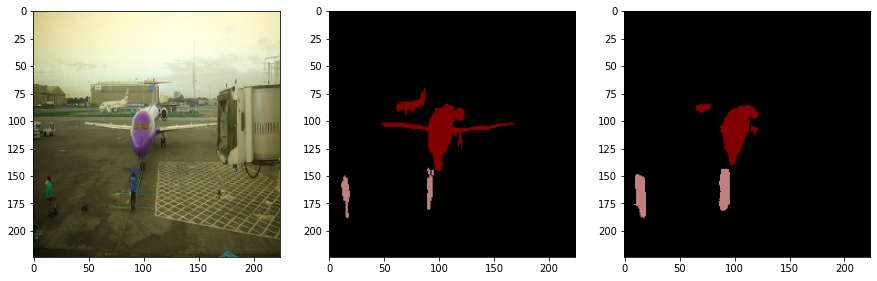

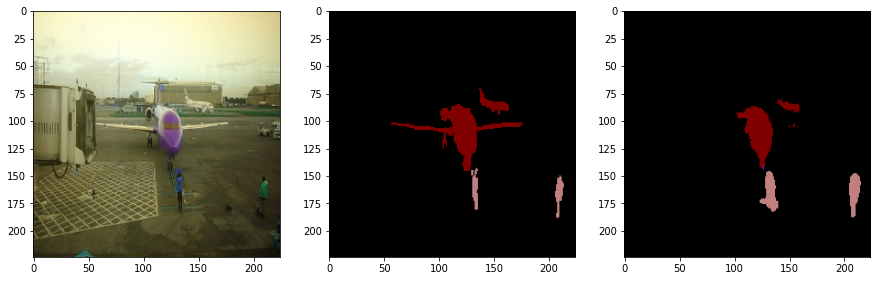

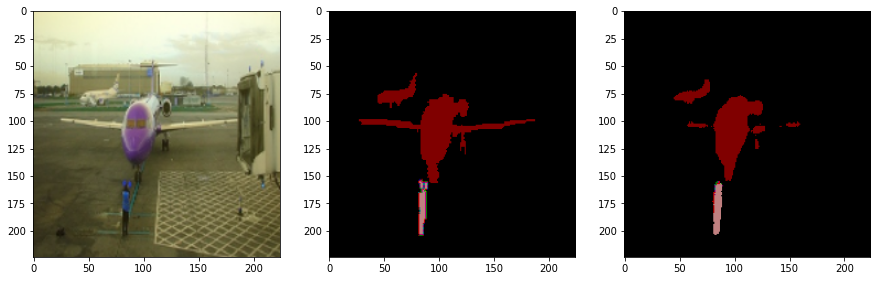

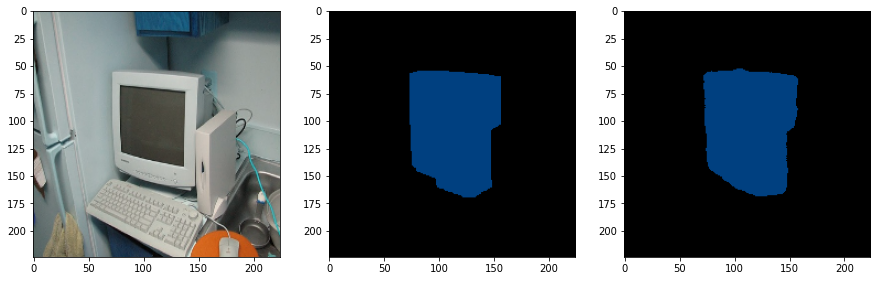

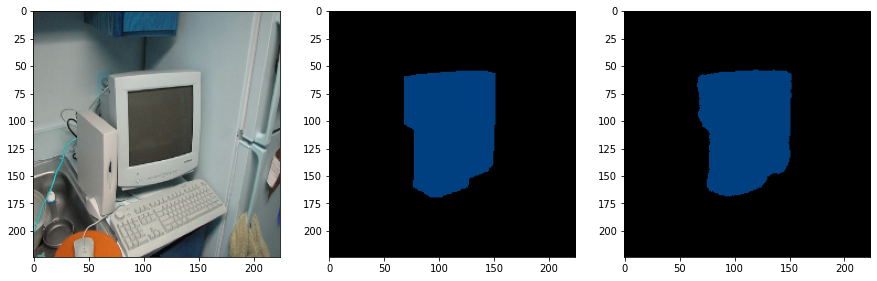

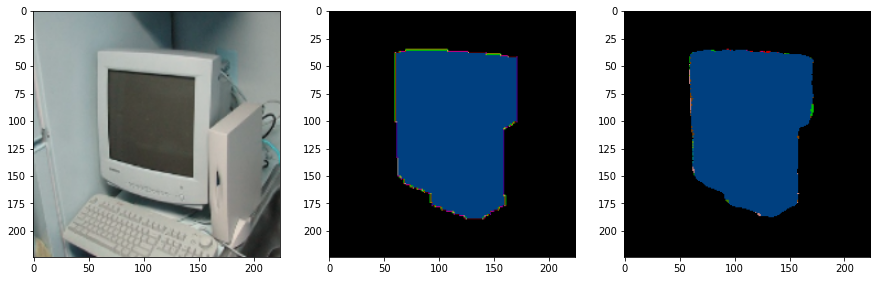

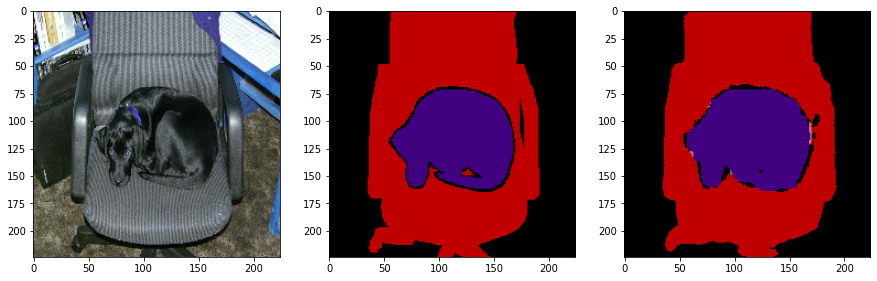

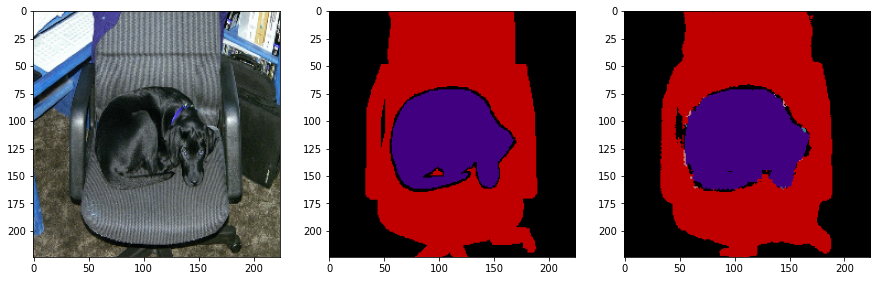

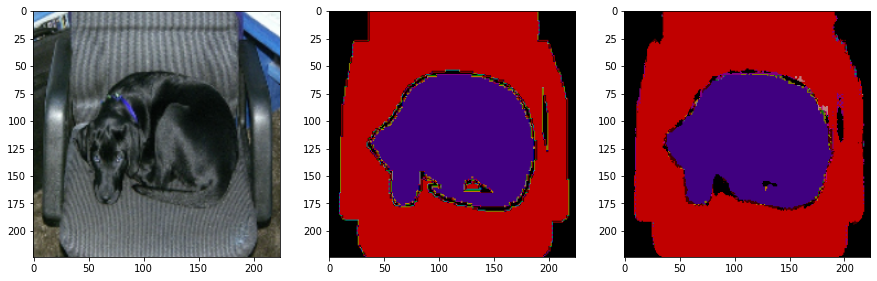

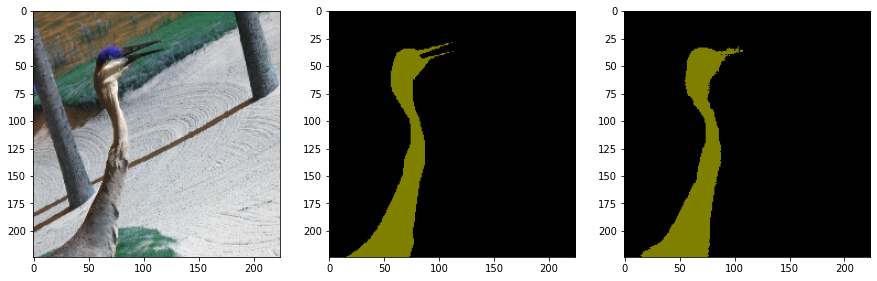

In [ ]:
fcn_resnet = FCN_resnet_bn_skp()
if torch.cuda.is_available():
#     checkpoint = torch.load("./model/fcn_200.pt")
#     fcn.load_state_dict(checkpoint)

    fcn_resnet = torch.load("./model/checkpoint/fcn_resnet_bn_skp_ce_augumented_e90.pt")

else:
#     checkpoint = torch.load("./model/fcn_200.pt", map_location=torch.device('cpu'))
#     fcn.load_state_dict(checkpoint)
    
    fcn_resnet = torch.load("./model/fcn_resnet_bn_skp_ce_augumented.pt", map_location=torch.device('cpu'))

# print(fcn)
# cuda_avail = torch.cuda.is_available()
# if cuda_avail:
#     torch.cuda.manual_seed(0)
# else:
#     torch.manual_seed(0)
# model,_ ,_ = load_model(name)

for i in range(10):
  visualizePrediction(fcn_resnet, voc2012.train_images[i], voc2012.train_labels[i])

# for i in range(20):
#   visualizePrediction(fcn_resnet, voc2012.val_images[i], voc2012.val_labels[i])

In [ ]:
from google.colab import files
# files.download("./model/checkpoint/fcn_resnet_bn_skp_ce_augumented_e30.pt")
# files.download("./model/checkpoint/fcn_resnet_bn_skp_ce_augumented_e60.pt")
# files.download("./model/checkpoint/fcn_resnet_bn_skp_ce_augumented_e90.pt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

fcn_resnet_bn_skp_ce_augumented.pt


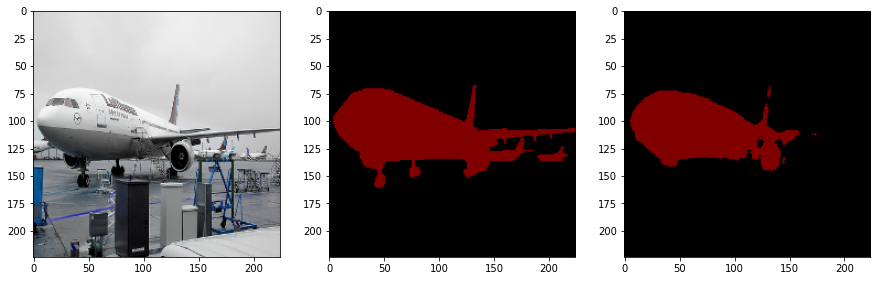

fcn_resnet_bn_skp_ce_augumented.pt


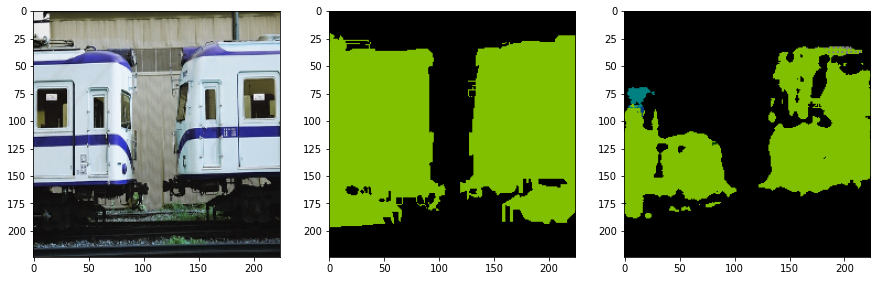

fcn_resnet_bn_skp_ce_augumented.pt


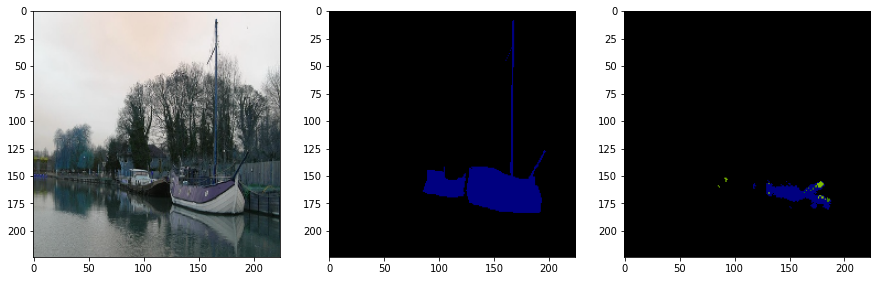

fcn_resnet_bn_skp_ce_augumented.pt


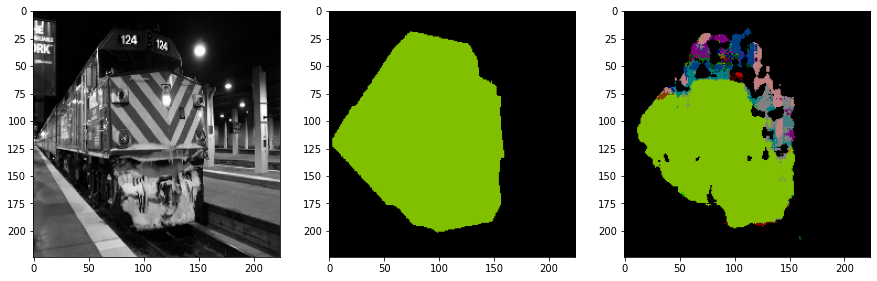

fcn_resnet_bn_skp_ce_augumented.pt


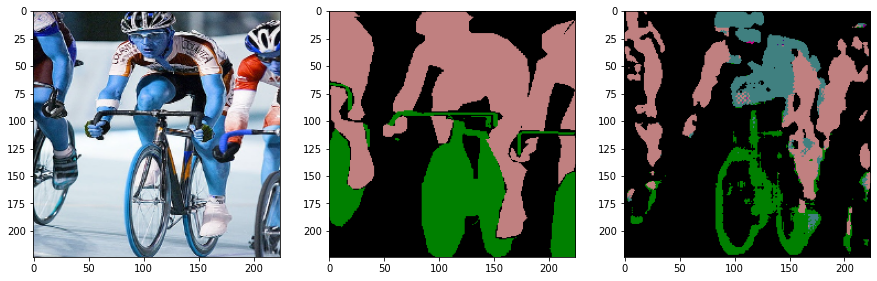

checkpoint/fcn_resnet_bn_skp_ce_augumented_e60.pt


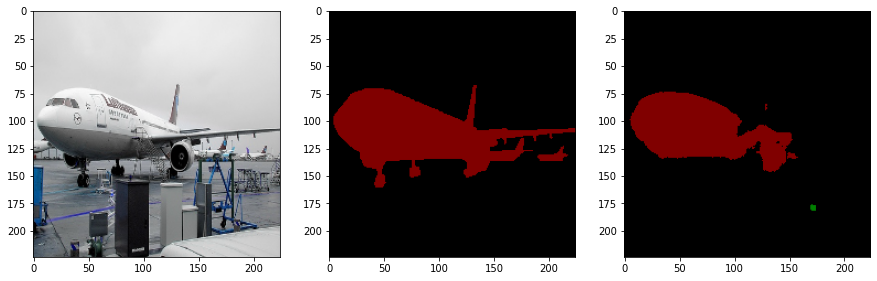

checkpoint/fcn_resnet_bn_skp_ce_augumented_e60.pt


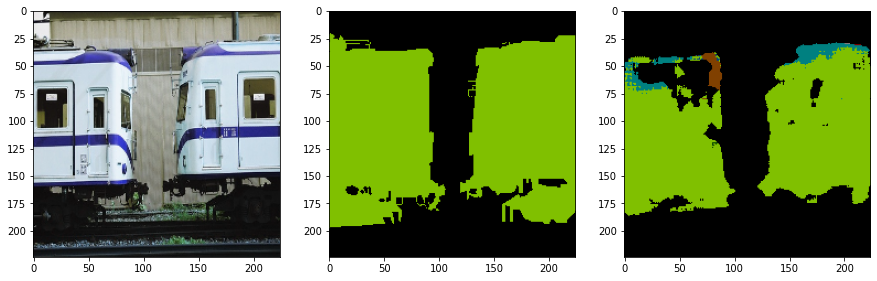

checkpoint/fcn_resnet_bn_skp_ce_augumented_e60.pt


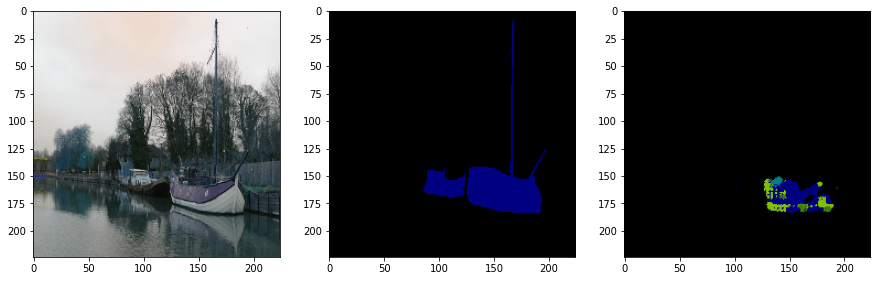

checkpoint/fcn_resnet_bn_skp_ce_augumented_e60.pt


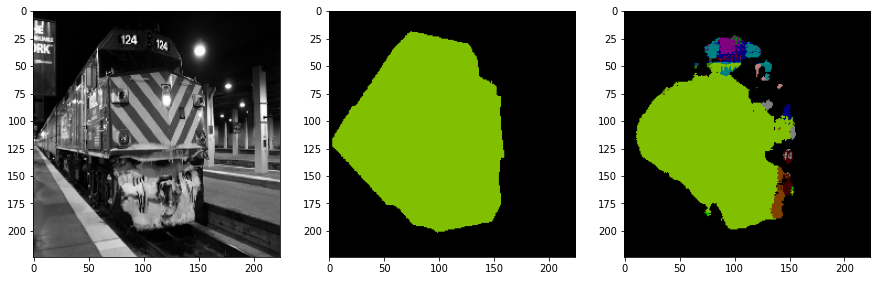

checkpoint/fcn_resnet_bn_skp_ce_augumented_e60.pt


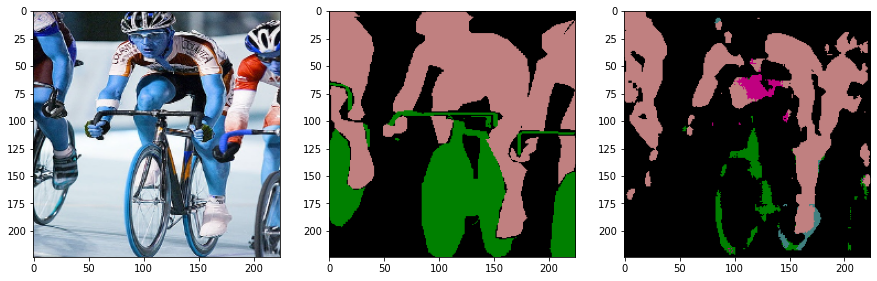

checkpoint/fcn_resnet_bn_skp_ce_augumented_e90.pt


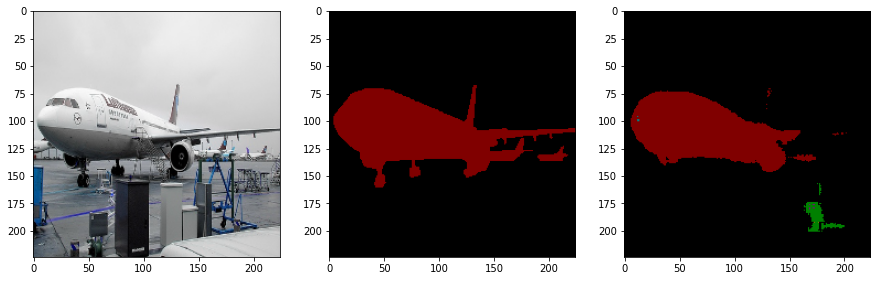

checkpoint/fcn_resnet_bn_skp_ce_augumented_e90.pt


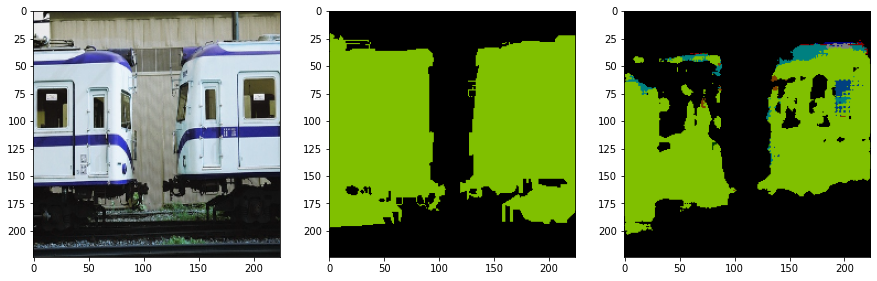

checkpoint/fcn_resnet_bn_skp_ce_augumented_e90.pt


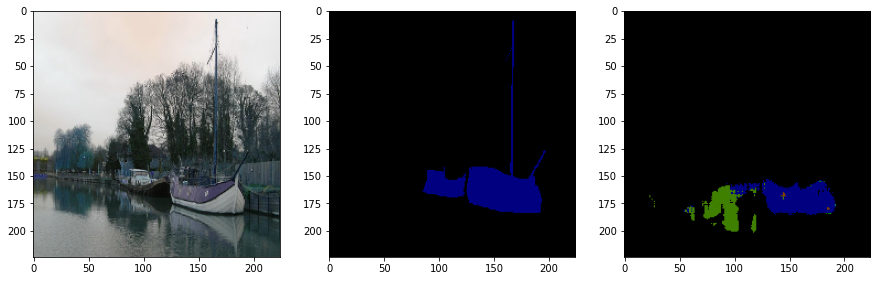

checkpoint/fcn_resnet_bn_skp_ce_augumented_e90.pt


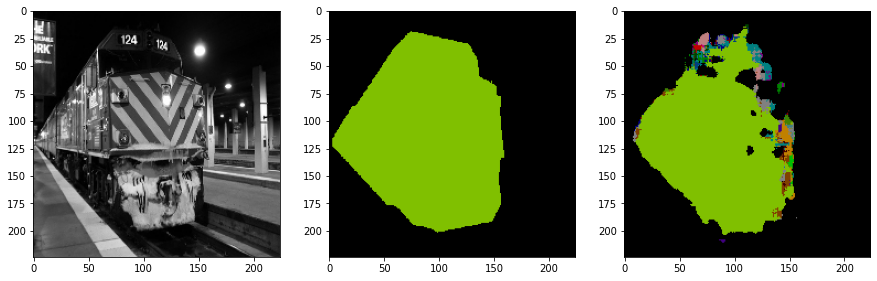

checkpoint/fcn_resnet_bn_skp_ce_augumented_e90.pt


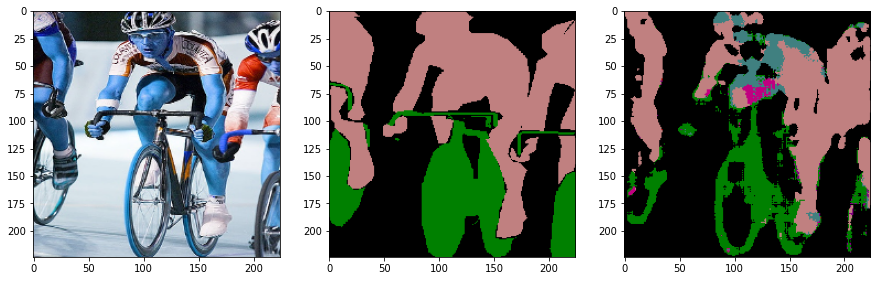

checkpoint/fcn_resnet_bn_skp_ce_augumented_e120.pt


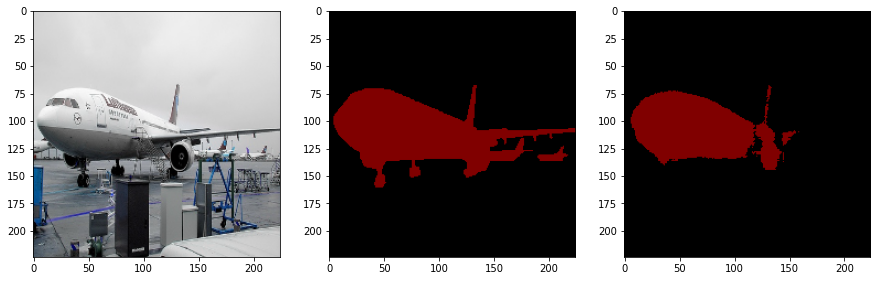

checkpoint/fcn_resnet_bn_skp_ce_augumented_e120.pt


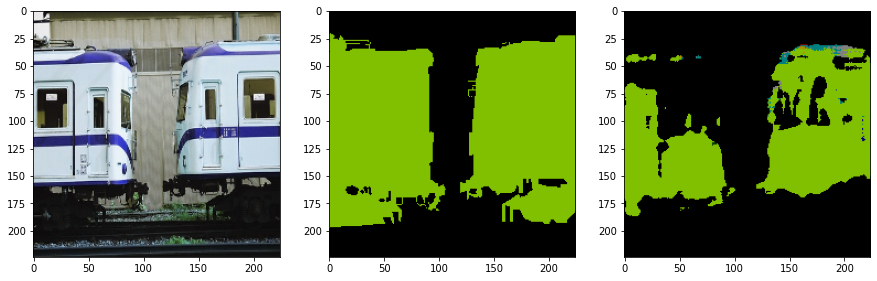

checkpoint/fcn_resnet_bn_skp_ce_augumented_e120.pt


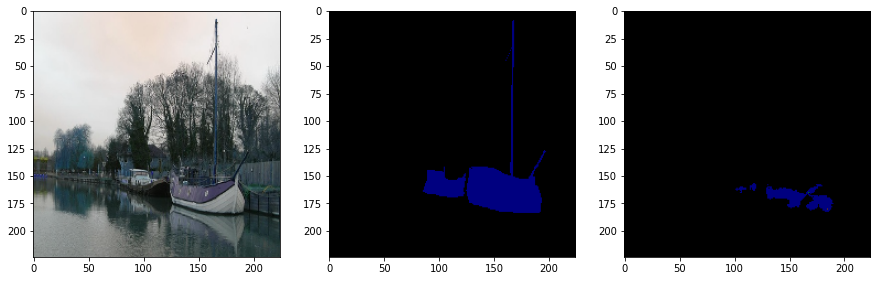

checkpoint/fcn_resnet_bn_skp_ce_augumented_e120.pt


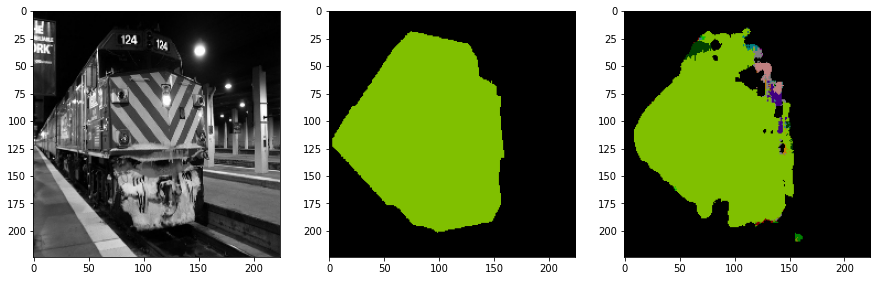

checkpoint/fcn_resnet_bn_skp_ce_augumented_e120.pt


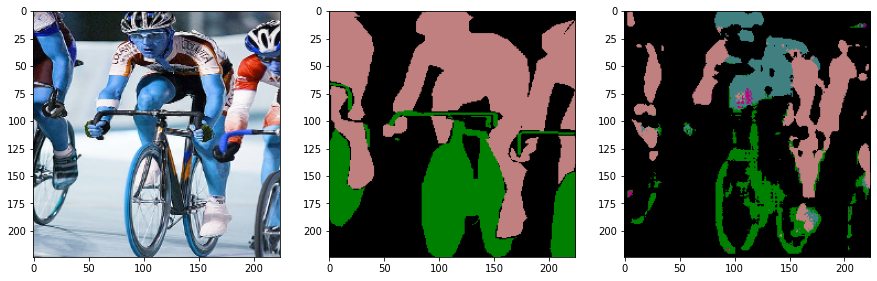

In [ ]:
names = [
    'fcn_resnet_bn_skp_ce_augumented.pt', 
    'checkpoint/fcn_resnet_bn_skp_ce_augumented_e60.pt', 
    'checkpoint/fcn_resnet_bn_skp_ce_augumented_e90.pt',
    'checkpoint/fcn_resnet_bn_skp_ce_augumented_e120.pt'
]
for name in names:
    for i in range(5):
      fcn_resnet = torch.load("./model/"+name)
      print(name)
      visualizePrediction(fcn_resnet, voc2012.val_images[i], voc2012.val_labels[i])